## How Long it Takes to Start a Business in Africa's Top 10 Economies

This is Data cleaning and Exploratory analysis of the amount of days it takes to start a business in the top ten economies in Africa. Data was downloaded courtesy, World Bank.

#### Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Import Data

In [30]:
starting_business = pd.read_csv('starting_business.csv')
starting_business.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.5,9.5,9.5,6.5,8.5,8.5,8.5,8.5,8.5,8.5
2,Angola,AGO,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.0,66.0,66.0,66.0,66.0,36.0,36.0,36.0,36.0,36.0
3,Albania,ALB,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,4.5
4,Andorra,AND,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Look Through all the Columns

In [31]:
starting_business.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

#### Drop Columns with all Empty Values

In [32]:
null_cols = ['Country Code', 'Indicator Name', 'Indicator Code','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002']

starting_business.drop(labels=null_cols, axis=1, inplace=True)

#### Extract the top ten Economies in Africa

In [33]:
countries = starting_business['Country Name'].isin(['Nigeria', 'South Africa', 'Egypt, Arab Rep.', 'Algeria', 'Morocco',
                                                   'Kenya', 'Angola', 'Ethiopia', 'Ghana', 'Tanzania'])

starting_business = starting_business[countries]

starting_business.head()

,Country Name,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,Angola,83.0,83.0,83.0,83.0,83.0,68.0,68.0,66.0,66.0,66.0,66.0,66.0,36.0,36.0,36.0,36.0,36.0
58,Algeria,25.0,24.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,20.0,18.0,18.0,18.0,18.0,18.0
65,"Egypt, Arab Rep.",42.5,42.5,26.5,23.5,17.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,16.5,16.5,16.5,11.5,12.5
70,Ethiopia,47.0,35.0,35.0,19.0,19.0,19.0,20.0,20.0,40.0,40.0,39.0,39.0,35.0,35.0,33.0,32.0,32.0
81,Ghana,21.0,21.0,17.0,17.0,13.0,11.0,11.0,11.0,11.0,11.0,14.0,14.0,14.0,14.0,14.0,14.0,13.0


#### Fill in Null Values with the Median

In [34]:
# Only Nigeria had null values, so it was filled in with a value of 31 based on analysis  of data.

starting_business.fillna('31', inplace=True)
starting_business.head(3)

,Country Name,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,Angola,83,83,83,83,83,68,68,66,66,66,66.0,66.0,36.0,36.0,36.0,36.0,36.0
58,Algeria,25,24,22,22,22,22,22,22,22,22,22.0,20.0,18.0,18.0,18.0,18.0,18.0
65,"Egypt, Arab Rep.",42.5,42.5,26.5,23.5,17.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,16.5,16.5,16.5,11.5,12.5


#### Round up the Numbers and Convert to Integers 

In [35]:
starting_business.round()

numeric_columns = ['2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019']

starting_business[numeric_columns] = starting_business[numeric_columns].astype('int')

starting_business.dtypes

starting_business.head(3)


,Country Name,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,Angola,83,83,83,83,83,68,68,66,66,66,66,66,36,36,36,36,36
58,Algeria,25,24,22,22,22,22,22,22,22,22,22,20,18,18,18,18,18
65,"Egypt, Arab Rep.",42,42,26,23,17,12,12,12,12,12,12,12,16,16,16,11,12


#### Set Column as Index and Transpose Data

In [36]:
starting_business.set_index('Country Name', inplace=True)
starting_business = starting_business.transpose()

#### Rename Egypt Column

In [43]:
starting_business.rename({'Egypt, Arab Rep.': 'Egypt'}, inplace=True, axis=1)

In [44]:
starting_business.head()

Country Name,Angola,Algeria,Egypt,Ethiopia,Ghana,Kenya,Morocco,Nigeria,Tanzania,South Africa
2003,83,25,42,47,21,60,35,31,36,56
2004,83,24,42,35,21,47,12,31,36,56
2005,83,22,26,35,17,55,12,31,36,53
2006,83,22,23,19,17,55,12,31,33,53
2007,83,22,17,19,13,45,12,31,32,53


### Exploratory Analysis

#### Summary Statistics

In [45]:
starting_business.describe()

Country Name,Angola,Algeria,Egypt,Ethiopia,Ghana,Kenya,Morocco,Nigeria,Tanzania,South Africa
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,62.411765,21.000000,17.941176,31.705882,14.176471,36.176471,12.470588,27.000000,31.000000,47.235294
std,18.930989,2.236068,9.971651,8.949614,3.186599,12.037625,5.927875,7.770135,2.783882,5.006613
min,36.000000,18.000000,11.000000,19.000000,11.000000,22.000000,9.000000,7.000000,27.000000,40.000000
25%,36.000000,18.000000,12.000000,20.000000,11.000000,28.000000,10.000000,30.000000,29.000000,45.000000
50%,66.000000,22.000000,12.000000,35.000000,14.000000,33.000000,12.000000,31.000000,31.000000,45.000000
75%,83.000000,22.000000,17.000000,39.000000,14.000000,45.000000,12.000000,31.000000,32.000000,53.000000
max,83.000000,25.000000,42.000000,47.000000,21.000000,60.000000,35.000000,31.000000,36.000000,56.000000


#### Plot Line Graph to see Trend

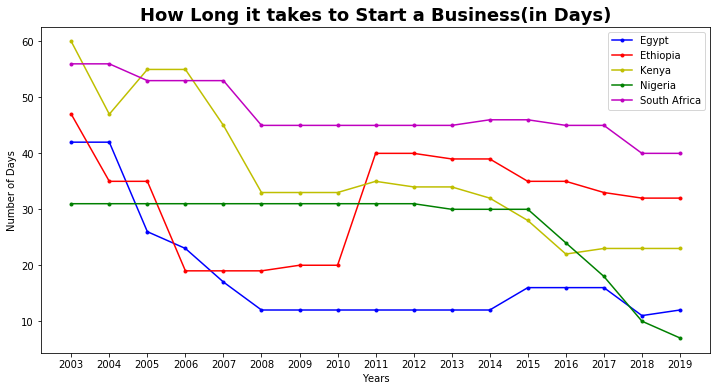

In [70]:
plt.figure(figsize=(12, 6))

plt.title('How Long it takes to Start a Business(in Days)', fontdict={'fontweight':'bold', 'fontsize': 18})

countries = [ 'Egypt','Ethiopia', 'Kenya', 'Nigeria', 'South Africa']

xAxis = starting_business.index

plt.plot(xAxis, starting_business.Egypt, 'b.-', label='Egypt')
plt.plot(xAxis, starting_business.Ethiopia, 'r.-', label='Ethiopia')
plt.plot(xAxis, starting_business.Kenya, 'y.-', label='Kenya')
plt.plot(xAxis, starting_business.Nigeria, 'g.-', label='Nigeria')
plt.plot(xAxis, starting_business['South Africa'], 'm.-', label='South Africa')

#for country in starting_business:
#    if country in countries:
#        plt.plot(xAxis, starting_business[country], marker='.')
        
plt.xlabel('Years')
plt.ylabel('Number of Days')

plt.legend()

plt.xticks(xAxis)

plt.show()